In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [39]:
def gather_stats(path: Path) -> pd.DataFrame:
    """Read stats.csv files and return a single dataframe containing all stats."""
    results = []

    for stats_file in path.rglob('stats.csv'):
        try:
            results.append(pd.read_csv(stats_file))
        except Exception as e:
            print(f"Error reading {stats_file}: {e}")

    return pd.concat(results, ignore_index=True) if results else pd.DataFrame()


In [40]:
notebook_path = Path().absolute()
data_path = notebook_path / '..' / 'data_output' / 'image_patches_from_25_test_photos' / 'train'

df = gather_stats(data_path)

# Only show summary rows (marked with *)
df = df[df['path'].str.contains('\*\*')]

# Remove the 'data_output/image_patches_from_25_test_photos/train' prefix from each path
df['path'] = df['path'].str.replace('data_output/image_patches_from_25_test_photos/train/', '')

# Remove the '/**' suffix from each path
df['path'] = df['path'].str.replace('/**', '')

# Split by detector
df_sift = df[df['detector'] == 'SIFT']
df_orb = df[df['detector'] == 'ORB']
df_akaze = df[df['detector'] == 'AKAZE']
df_brisk = df[df['detector'] == 'BRISK']

In [41]:
def show_stat(df, detector):
    plt.figure(figsize=(18, 6))
    plt.bar(df['path'], df['f_mean'])

    plt.title(detector + ' features by patch type')
    plt.xlabel('Patch type')
    plt.ylabel('Mean feature count')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

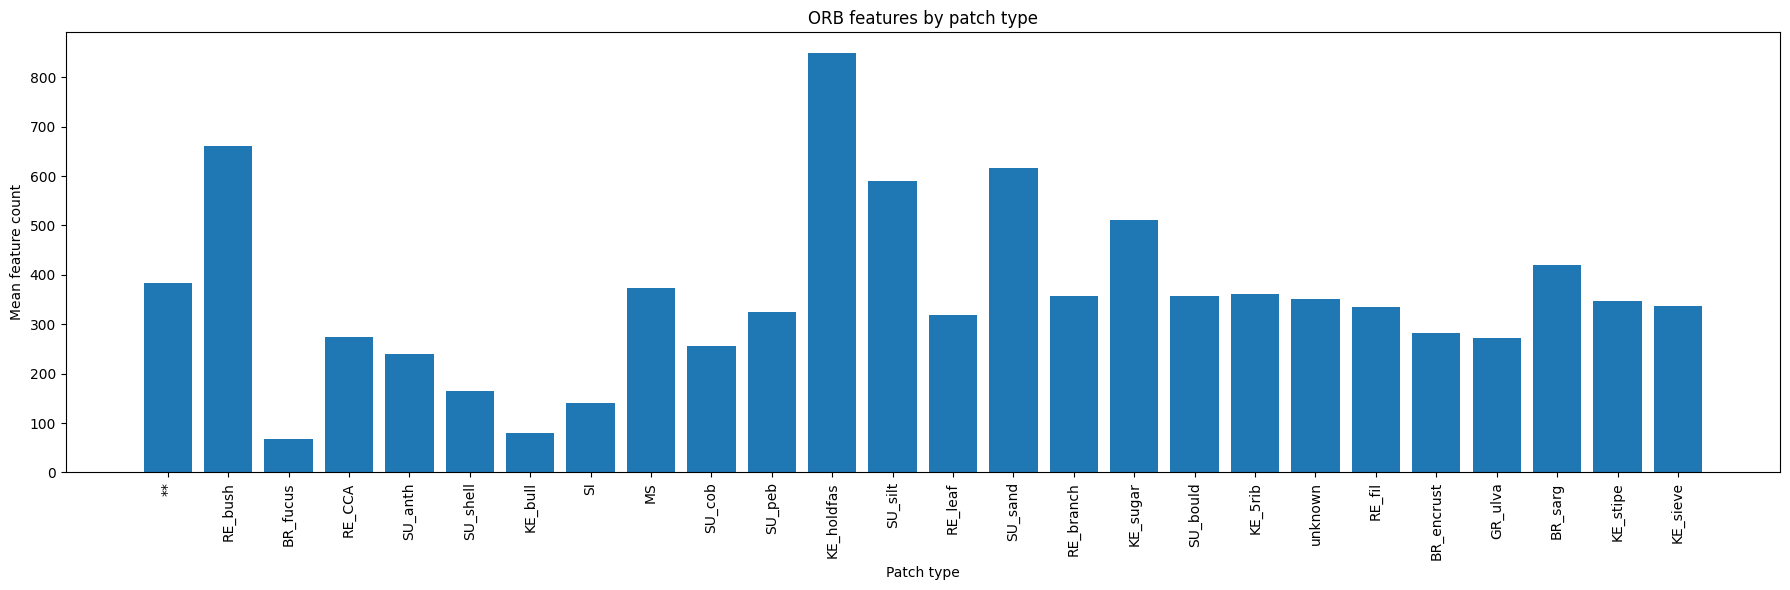

In [42]:
show_stat(df_orb, 'ORB')

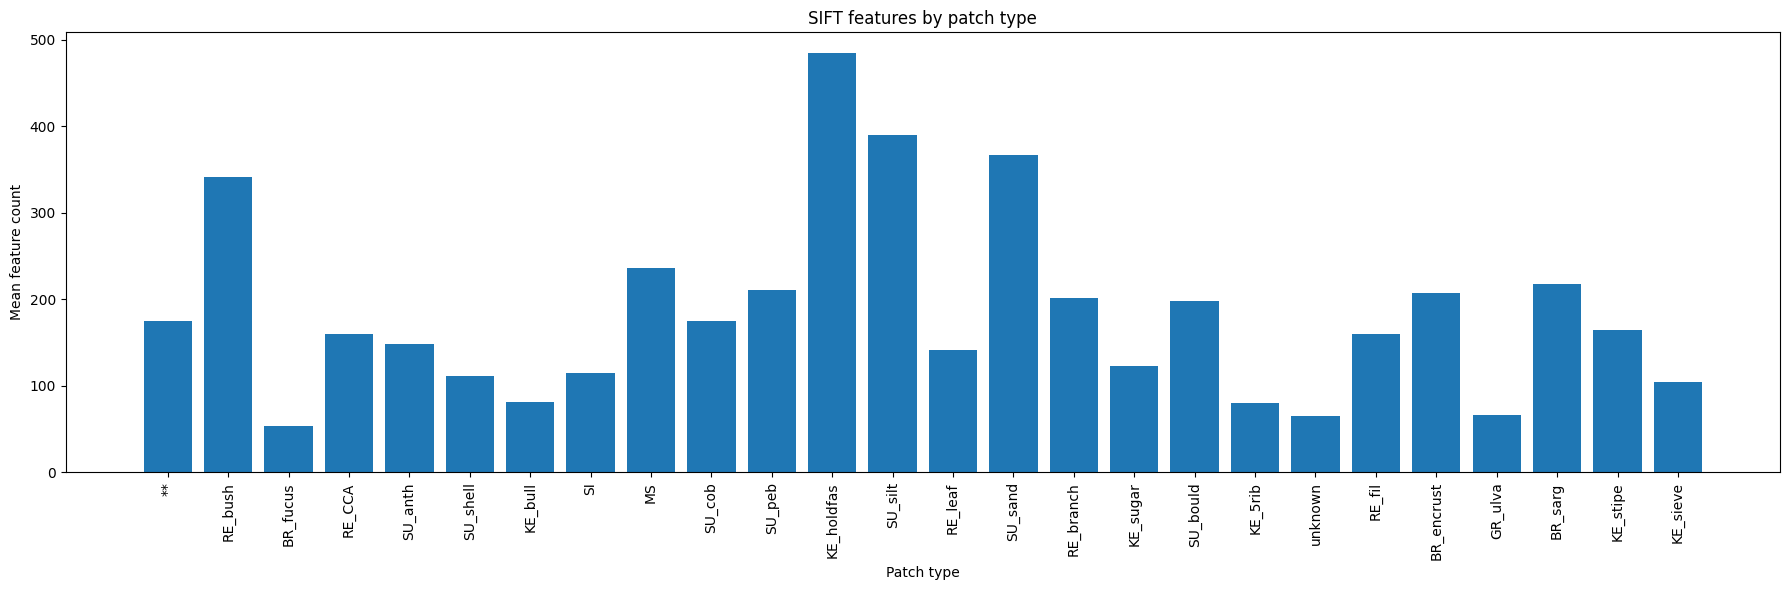

In [43]:
show_stat(df_sift, 'SIFT')

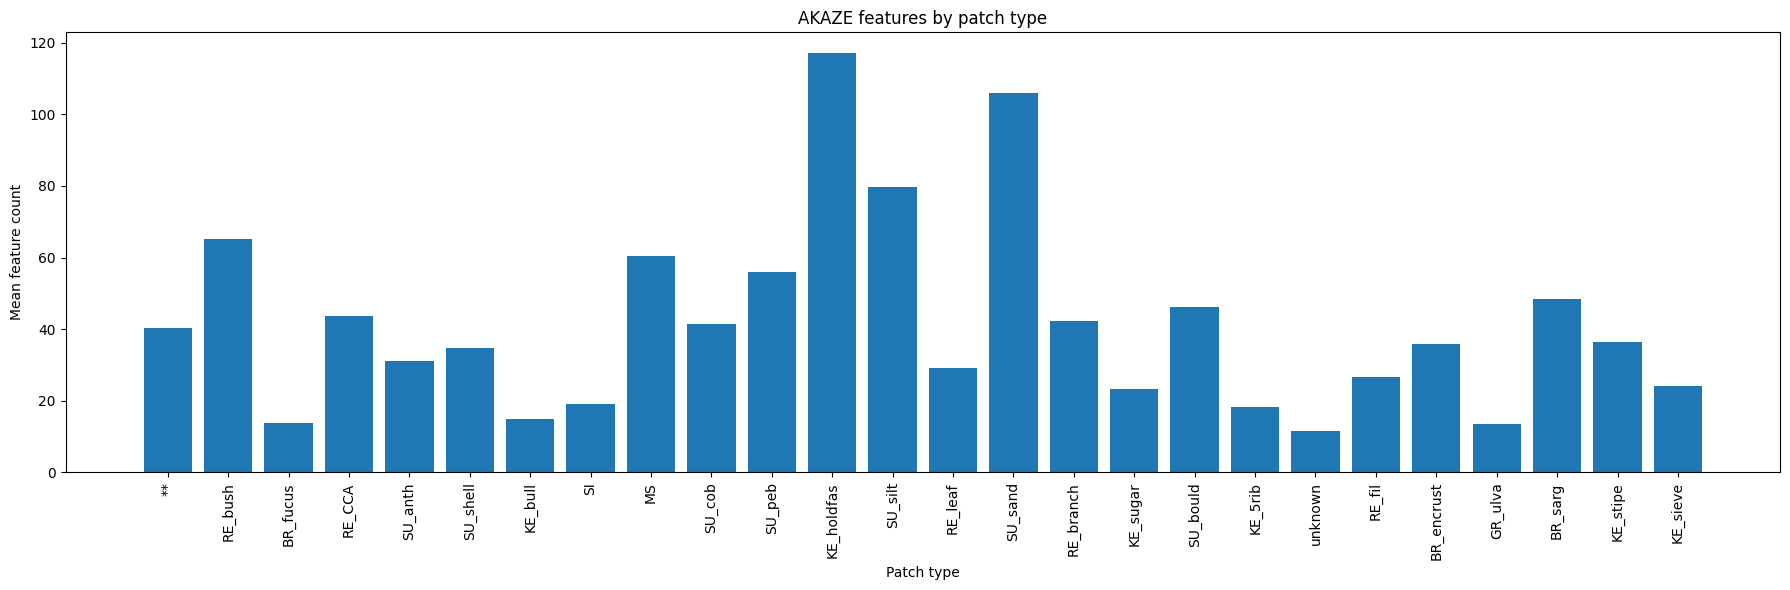

In [44]:
show_stat(df_akaze, 'AKAZE')

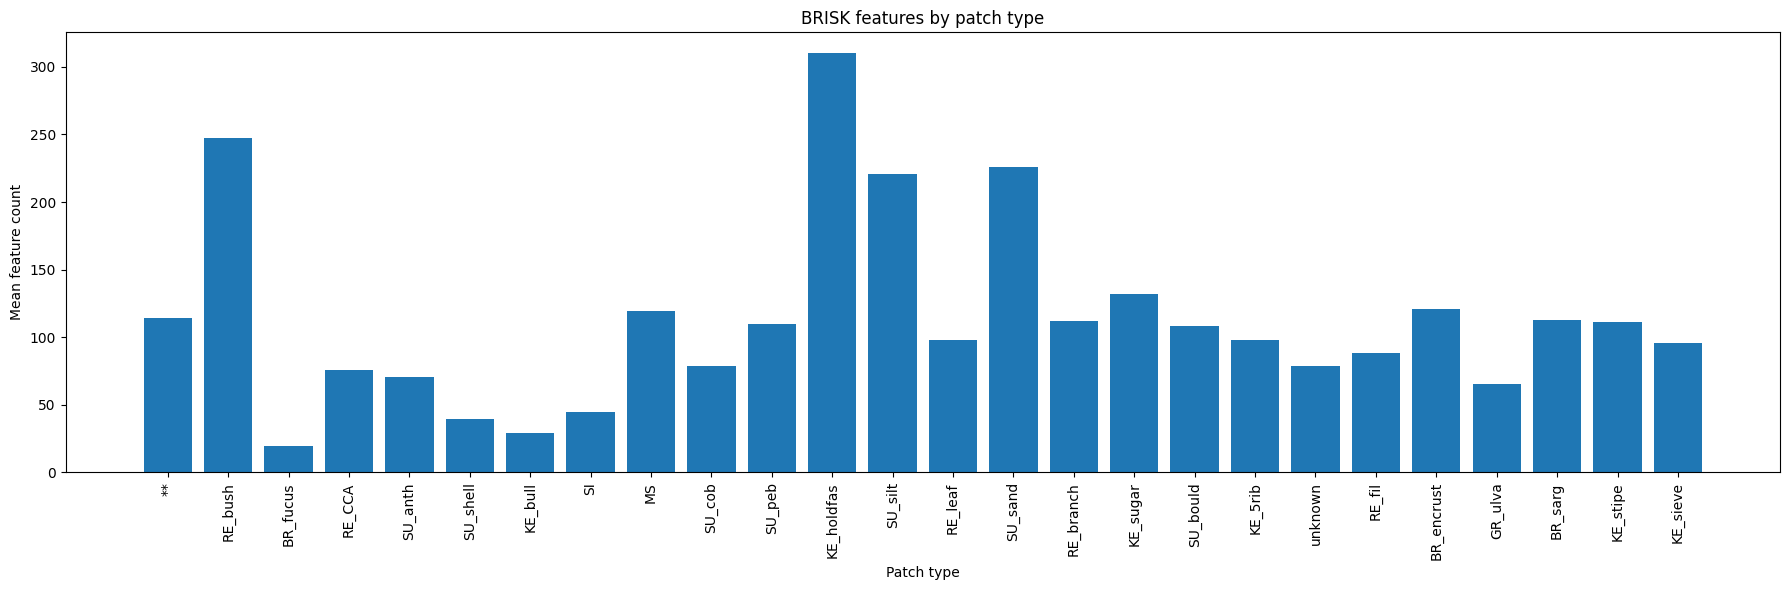

In [45]:
show_stat(df_brisk, 'BRISK')